# Introduction to the EnergyModel class

The core of our package is the EnergyModel class. An instance of this class can be used for synthetic data generation, model optimization, and feature consistency analysis. The instance of this class contains all of the relevant attributes, including the grid points of the latent domain, framework parameters (model potential, noise magnitude, p0(x) distribution, firing rate functions), and also methods for data generation, model optimization, and feature consistency analysis.

The short version of the description of EnergyModel class is listed below for convenience, also see the docstring for the full list of parameters, methods, and variables. **Note that the description below does not contain a full list of availible parameters/attributes, and also the description of each parameter is simplified for this tutorial. For the full documentation, see the docstring or readthedocs page.**

    class EnergyModel(BaseEstimator):
        """Energy Model class.
        
        
        Parameters
        ----------
        num_neuron : int
            A number of neuronal responses. 
        peq_model : dictionary or lambda function
            peq(x) function. This function defines model potential via Phi(x)=-log(peq(x)). Can be specified 
            as a custom lambda function, or as a model from the neuralflow/peq_models.py file. 
        p0_model : dictionary or lambda function
            Initial probability distribution. Can be specified as a custom 
            lambda function, or as a model from the neuralflow/peq_models.py file.
        D0 : float
            The diffusion, or the noise magnitude. The default is 0.56.
        firing_model : list
            For each neuron, this list contains the firing rate functions. Each firing rate function can be 
            specified as a custom lambda function, or as a model from the neuralflow/firing_rate_models.py file.
        boundary_mode : string
            Specify boundary mode that will set boundary conditions for the optimization/data generation. Can
            be 'absorbing'  or 'reflecting'
        pde_solve_param : dictionary
            Dictionary with the parameters of the grid. For example, can be set to 
            {'method':{'name': 'SEM', 'gridsize': {'Np': 8, 'Ne': 64}}}. Here the spectral elements method 
            (SEM) for the numerical solution of the Fokker-Planck equation is used, where Np is the number of 
            grid points on a single element, and Ne is the number of elements. The total number of grid points 
            in the latent domain is N = (Np-1)*Ne +1. For examplem, if Np=8, Ne=64, then N=449.
        verbose : bool
            Whether or not to display informational messages during optimization/data generation.
            
        Attributes
        ----------
        N : int
            The total number of grid points.       
        x_d_ : numpy array, dtype=float, shape = (N,)
            An array of grid points of the latent domain.
        peq_ : numpy array, dtype=float, shape = (N,)
            The peq function which defines the model potential evaluated at grid points. 
            The potential is Phi = -np.log(peq)
        p0_ : numpy array, dtype=float, shape = (N,)
            The initial distribution of the latent states p0 evaluated at grid points.
        D_ : float
            The noise magnitude.
        fr_: numpy array, dtype=float, shape = (N,num_neuron)
            An array with firing rate functions for each neuron evaluated at grid points.
            

**In this task you will create EnergyModel class and visualize the framework parameters**.

In [15]:
# Package installation - needed to run in google Collab. Skip this cell if you use local jupyter notebook
!pip install git+https://github.com/engellab/neuralflow

  Cloning https://github.com/engellab/neuralflow to /private/var/folders/xt/nql8j4c959l6b4s54h4l91340000gn/T/pip-req-build-y7fx0_ju
  Running command git clone -q https://github.com/engellab/neuralflow /private/var/folders/xt/nql8j4c959l6b4s54h4l91340000gn/T/pip-req-build-y7fx0_ju
  Created wheel for neuralflow: filename=neuralflow-2.0.1-cp38-cp38-macosx_10_9_x86_64.whl size=113033 sha256=d2e4a007ab5fdf7fca3fbeef745b36576ba6ef2588232d0d554577d92d654e0f
  Stored in directory: /private/var/folders/xt/nql8j4c959l6b4s54h4l91340000gn/T/pip-ephem-wheel-cache-tt1aj919/wheels/ed/ef/2f/a174789969deebfdb593975a885eafc637a5af35a925ac34ff
Successfully built neuralflow
  Attempting uninstall: neuralflow
    Found existing installation: neuralflow 2.0.1
    Uninstalling neuralflow-2.0.1:
      Successfully uninstalled neuralflow-2.0.1


In [1]:
# Import packages 
import neuralflow
import numpy as np
import matplotlib.pyplot as plt, matplotlib.gridspec as gridspec

In [19]:
# Cell 1

# Specifies the parameters of the EnergyModel: ramping dynamics (linear potential), narrow 
# zero-centered p0(x) distribution, 2 neurons with linear and non-linear firing rate functions
EnergyModelParams={'num_neuron':2,
               'peq_model':{"model": "linear_pot", "params": {"slope": -2.65}},
               'p0_model':{"model": "single_well", "params": {"miu": 200, "xmin": 0}},
               'D0': 0.56,
               'firing_model':[{"model": "linear", "params": {"r_slope": 50, "r_bias": 60}},
                               {"model": "sinus", "params": {"bias": 50, "amp": 40}}],
               'boundary_mode':'absorbing', 
               'pde_solve_param':{'method':{'name': 'SEM', 'gridsize': {'Np': 8, 'Ne': 64}}},   
               'verbose':True
               }

# Create an instance of EnergyModel class
em=neuralflow.EnergyModel(**EnergyModelParams)

# Let us print some of the paramters
print(f'Our model has {em.num_neuron} neural responses')
print(f'The total number of grid points is {em.N}')

######INSERT YOUR CODE HERE############
print(f'The noise magnitude is {None}')
#######################################

Our model has 2 neural responses
The total number of grid points is 449
The noise magnitude is None


Text(0, 0.5, '$f_2(x), Hz$')

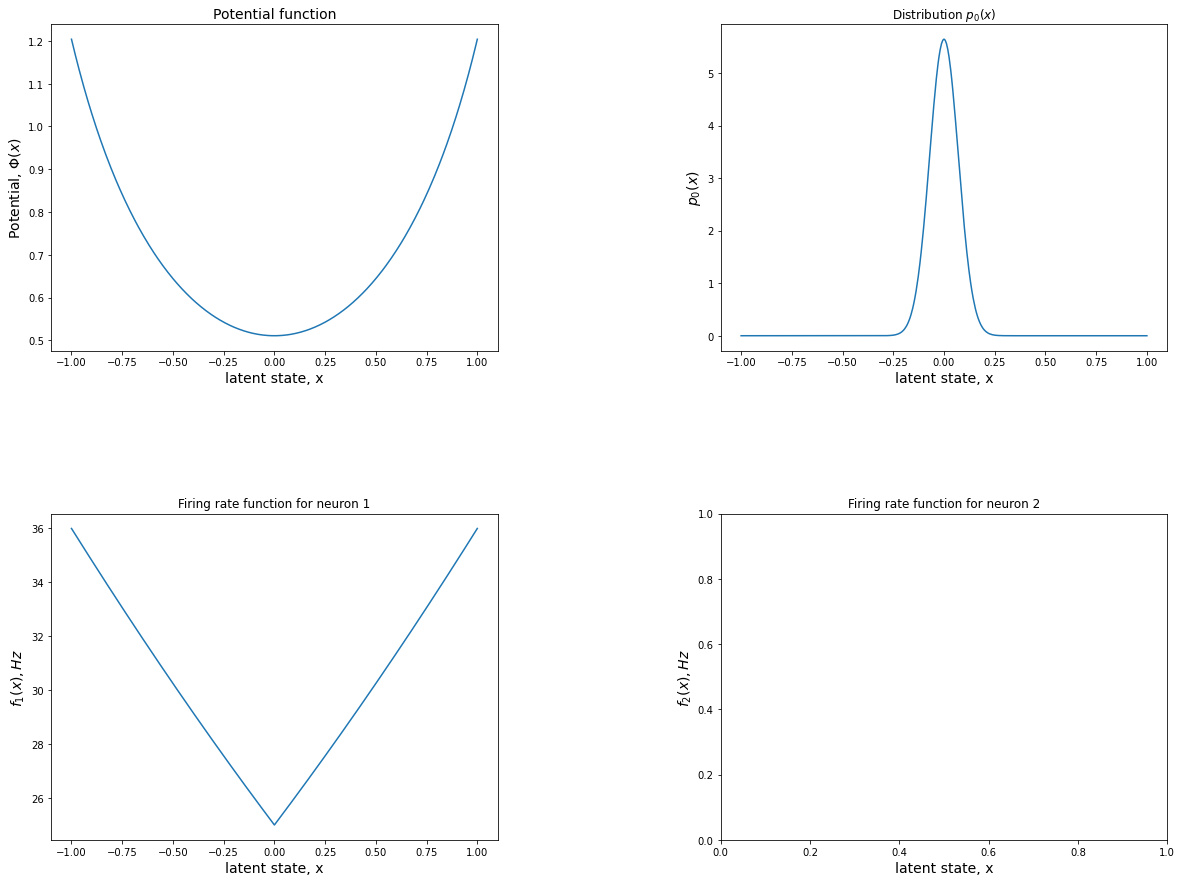

In [20]:
# Cell 2

# Now let us visualize model potential, p0(x) distribution, and firing rate functions for two neurons:

#Beginning of Ex2p1

fig=plt.figure(figsize=(20,15))
gs=gridspec.GridSpec(2,2,wspace=0.5,hspace=0.5);

# Potential function
ax = plt.subplot(gs[0])
ax.set_title('Potential function', fontsize=14)
plt.xlabel('latent state, x', fontsize=14)
plt.ylabel(r'Potential, $\Phi(x)$', fontsize=14)
plt.plot(em.x_d_,-np.log(em.peq_))

# p0(x) distribution
ax = plt.subplot(gs[1])
ax.set_title(r'Distribution $p_0(x)$')
plt.xlabel('latent state, x', fontsize=14)
plt.ylabel(r'$p_0(x)$', fontsize=14)
plt.plot(em.x_d_,em.p0_)

# Firing rate function of the first neuron f1(x)
ax = plt.subplot(gs[2])
ax.set_title('Firing rate function for neuron 1')
plt.xlabel('latent state, x', fontsize=14)
plt.ylabel(r'$f_1(x), Hz$', fontsize=14)
plt.plot(em.x_d_,em.fr_[:,0])

# Firing rate function of the second neuron f2(x)
ax = plt.subplot(gs[3])
ax.set_title('Firing rate function for neuron 2')
plt.xlabel('latent state, x', fontsize=14)
plt.ylabel(r'$f_2(x), Hz$', fontsize=14)

#Plot the firing rate function for the second neuron 
######INSERT YOUR CODE HERE##################
#plt.plot(None,None)
#############################################

Try initializing the EnergyModel class with different parameters.
The following options can be changed:
- Change peq model and visualize the new potential function (see neuralflow/peq_models.py file for a full list of the predefined functions):
    - Try the double well potential with different locations of the minimuma, barrier, and depth: `'peq_model':{"model": "double_well", "params": {"xmax":0, "xmin":0.5, "depth":2}}`
    - Try to define your own quadratic potential : `'peq_model': lambda x: 2-x**2`

- p0(x) can be changed in a fashion similar to peq.

- Try different firing rate functions (see neuralflow/firing_rate_models.py for a full list of the predefined firing rate functions).
    - Try `{"model": "peaks", "params": {"center":np.array([-0.5,0.5]), "width":np.array([0.2,0.3]), "amp":np.array([40,80])}}`
    - Try your own lambda function: `lambda x: (np.abs(x)+5)**2`.
- You can set noise magnitude to different positive values.
- Change Np/Ne and see how grid resolution changes.
- Try to define a model with 3 neuronal responses.